# Proyek Analisis Data: Penyewaan Sepeda
- **Nama:** AHMAD HAMDANI
- **Email:** ahmad.hamdani1955@gmail.com
- **ID Dicoding:** mc748d5y2305

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [69]:
days_df = pd.read_csv("./Data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
hours_df = pd.read_csv("./Data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset di atas, menampilkan data secara sempurna atau tidak ada kejanggalan.
- Dari ke dua data tersebut, bersifat saling berkaitan pada setiap kolomnya.

### Assessing Data

#### Menilai tabel `days_df`

In [71]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [72]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [74]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hours_day`

In [75]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [78]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari kedua data tersebut memiliki data yang lengkap tanpa ada missing value.
- Data yang ada cukup relate dan sesuai.
- Terdapat kurang kesesuaian tipe data pada kolom tertentu.

### Cleaning Data

#### Membersihkan tabel `days_df`

In [79]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Memperbaiki tipe data

In [80]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [81]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [82]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cek duplikasi data

In [83]:
days_df.duplicated().sum()

np.int64(0)

In [84]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [85]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [86]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [87]:
days_df[days_df.instant == days_df.instant.max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [88]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Membersihkan tabel `hours_df`

In [89]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [90]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [91]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [92]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Cek duplikasi data

In [93]:
hours_df.duplicated().sum()

np.int64(0)

In [94]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [95]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### Inaccurate value

In [96]:
hours_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dari data tersebut, tidak memiliki data yang hilang.
- Merubah tipe data 1 kolom pada masing-masing dataset.

## Exploratory Data Analysis (EDA)

### Explore `days_df`

In [97]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
352,353,2011-12-19,4,0,12,0,1,1,1,0.276667,0.280933,0.637500,0.172896,260,3143,3403
302,303,2011-10-30,4,0,10,0,0,0,1,0.319167,0.321329,0.623750,0.176617,885,2446,3331
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
482,483,2012-04-27,2,1,4,0,5,1,1,0.457500,0.452637,0.400833,0.347633,1014,5219,6233
97,98,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471


In [98]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [99]:
days_df.cnt.is_unique

False

In [100]:
days_df.cnt.duplicated

<bound method Series.duplicated of 0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64>

In [101]:
days_df.groupby(by="weathersit").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
weathersit                                     
1           8714  431  4876.786177  1879.483989
2           8362  605  4035.862348  1809.109918
3           4639   22  1803.285714  1240.284449

In [102]:
days_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [103]:
days_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [104]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
448,449,2012-03-24,2,1,3,0,6,0,2,0.502500,0.486733,0.885417,0.192783,1033,2339,3372
356,357,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.686250,0.274246,163,2046,2209
220,221,2011-08-09,3,0,8,0,2,1,1,0.775000,0.724121,0.570417,0.151121,907,3695,4602
285,286,2011-10-13,4,0,10,0,4,1,2,0.589167,0.551804,0.896667,0.141787,290,2623,2913
325,326,2011-11-22,4,0,11,0,2,1,3,0.416667,0.421696,0.962500,0.118792,69,1538,1607


In [105]:
days_df["days_from_start"] = days_df["cnt"] - days_df["cnt"].min()

In [106]:
days_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660,6638
489,490,2012-05-04,2,1,5,0,5,1,1,0.627500,0.590917,0.735417,0.162938,1069,5227,6296,6274
271,272,2011-09-29,4,0,9,0,4,1,1,0.616667,0.574512,0.699167,0.172883,653,4186,4839,4817
507,508,2012-05-22,2,1,5,0,2,1,2,0.615000,0.580825,0.765833,0.118167,819,5254,6073,6051
129,130,2011-05-10,2,0,5,0,2,1,1,0.532500,0.522721,0.489167,0.115671,694,4109,4803,4781


In [107]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,963
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,779
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1327
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1540
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1578


In [108]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4482.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3130.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4526.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,5934.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,8692.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1937.211452


<Axes: >

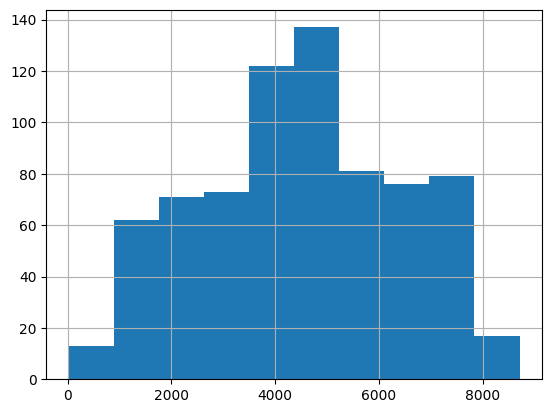

In [109]:
days_df.cnt.hist()

### Explore `hours_df`

In [110]:
hours_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10668,10669,2012-03-25,2,1,3,15,0,0,0,2,0.44,0.4394,0.88,0.1940,139,282,421
5657,5658,2011-08-29,3,0,8,4,0,1,1,1,0.56,0.5303,0.68,0.1343,0,3,3
15545,15546,2012-10-14,4,1,10,22,0,0,0,1,0.56,0.5303,0.73,0.3881,38,87,125
3576,3577,2011-06-02,2,0,6,22,0,4,1,1,0.64,0.6212,0.33,0.2537,14,141,155
11915,11916,2012-05-16,2,1,5,16,0,3,1,1,0.72,0.6515,0.45,0.1045,70,376,446


In [111]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [112]:
hours_df.instant.is_unique

True

In [113]:
hours_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [114]:
hours_df.groupby(by="dteday").agg({
    "hr": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

hr  cnt                           
           nunique  max min        mean        std
dteday                                            
2011-01-01      24  110   1   41.041667  34.292196
2011-01-02      23   93   1   34.826087  29.785067
2011-01-03      22  157   1   61.318182  48.792453
2011-01-04      23  212   1   67.913043  59.889985
2011-01-05      23  195   2   69.565217  58.427753
...            ...  ...  ..         ...        ...
2012-12-27      24  257   1   88.083333  72.027722
2012-12-28      24  271   2  128.958333  95.264154
2012-12-29      24  147   3   55.875000  41.957859
2012-12-30      24  169   2   74.833333  56.244549
2012-12-31      24  315   1  113.708333  87.936973

[731 rows x 5 columns]

In [115]:
hours_df.groupby(by="cnt").instant.nunique().sort_values(ascending=False)

cnt
5      260
6      236
4      231
3      224
2      208
      ... 
849      1
850      1
851      1
976      1
977      1
Name: instant, Length: 869, dtype: int64

<Axes: >

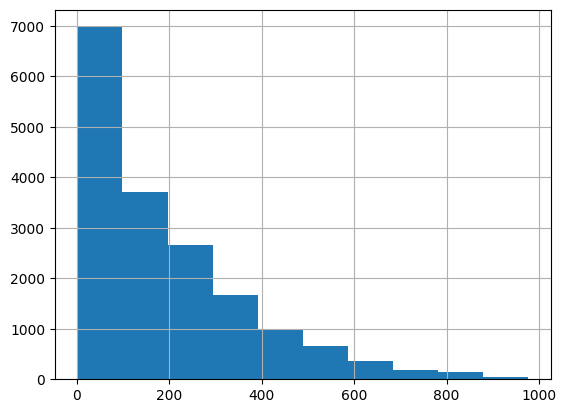

In [116]:
hours_df.cnt.hist()

### Explore `days_df` & `hours_df`

In [117]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,963
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,779
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1327
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1540
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1578


In [118]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [119]:
all_data_merge = pd.merge(
    left=hours_df,
    right=days_df.drop(columns=["instant", "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]),
    how="left",
    on="dteday"
)
all_data_merge.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,963
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,963
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,963
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,963
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,963


In [120]:
all_data_merge.groupby(by=["season", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
season mnth                    
1      1      12042      122891
       2      14963      136389
       3      27154      114911
       12      6463       36535
2      3      17290       69565
       4      60802      208292
       5      75285      256401
       6      50145      180809
3      6      23761       91627
       7      78157      266791
       8      72039      279155
       9      52134      197465
4      9      18189       78203
       10     59760      262592
       11     36603      218228
       12     15230      152808

In [121]:
all_data_merge.groupby(by=["dteday", "hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered  cnt
dteday     hr                         
2011-01-01 0        3          13   16
           1        8          32   40
           2        5          27   32
           3        3          10   13
           4        0           1    1
...               ...         ...  ...
2012-12-31 19      11         108  119
           20       8          81   89
           21       7          83   90
           22      13          48   61
           23      12          37   49

[17379 rows x 3 columns]

In [122]:
all_data_merge.groupby(by=["dteday", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered   cnt
dteday     weathersit                          
2011-01-01 1               98         207   305
           2              218         390   608
           3               15          57    72
2011-01-02 1               24         141   165
           2               75         342   417
...                       ...         ...   ...
2012-12-29 3               31         187   218
2012-12-30 1              349        1202  1551
           2               15         230   245
2012-12-31 1               56         542   598
           2              383        1748  2131

[1570 rows x 3 columns]

In [123]:
all_data_merge.to_csv("all_data.csv", index=False)

In [124]:
all = pd.read_csv("all_data.csv")
all.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_from_start
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,963
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,963
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,963
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,963
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,963


**Insight:**
- Dari 2 dataset tersebut tidak saling memiliki relasi atau keterkaitan secar langsung. Namun, memiliki kesamaan data pada `dteday`.
- Menggabungkan 2 dataset menjadi satu dengan dataset `hour.csv` sebagai induknya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
##### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

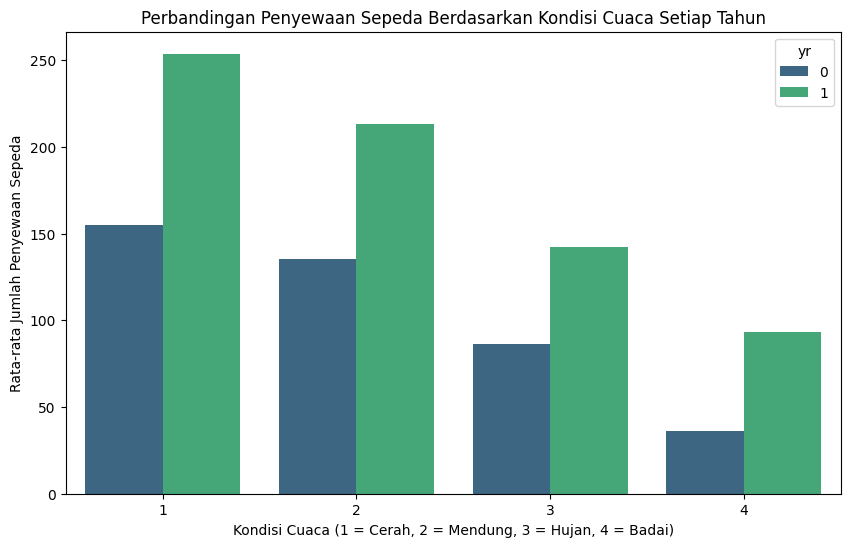

In [125]:
plt.figure(figsize=(10,6))
sns.barplot(data=all_data_merge, x="weathersit", y="cnt", hue="yr", palette="viridis", errorbar=None)

plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan, 4 = Badai)")
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Kondisi Cuaca Setiap Tahun")

plt.show()

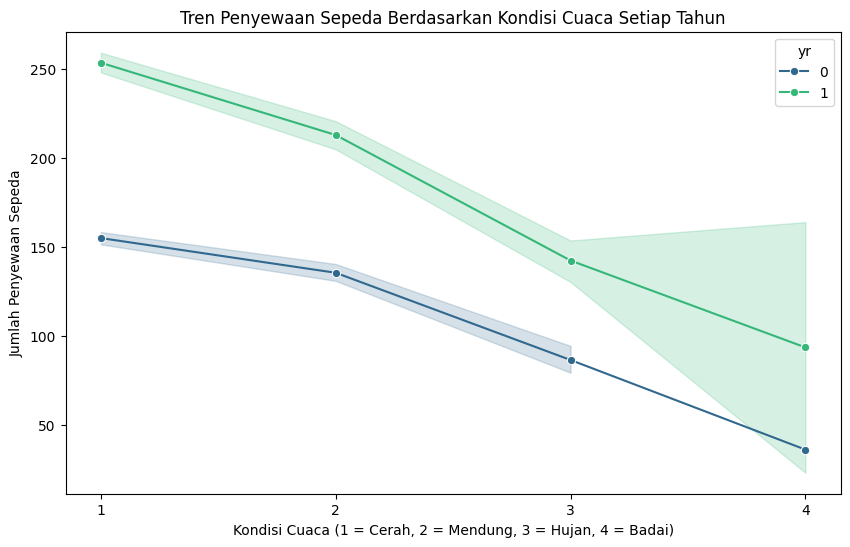

In [126]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_data_merge, x="weathersit", y="cnt", hue="yr", marker="o", palette="viridis")

plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan, 4 = Badai)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda Berdasarkan Kondisi Cuaca Setiap Tahun")
plt.xticks([1, 2, 3, 4])  

plt.show()

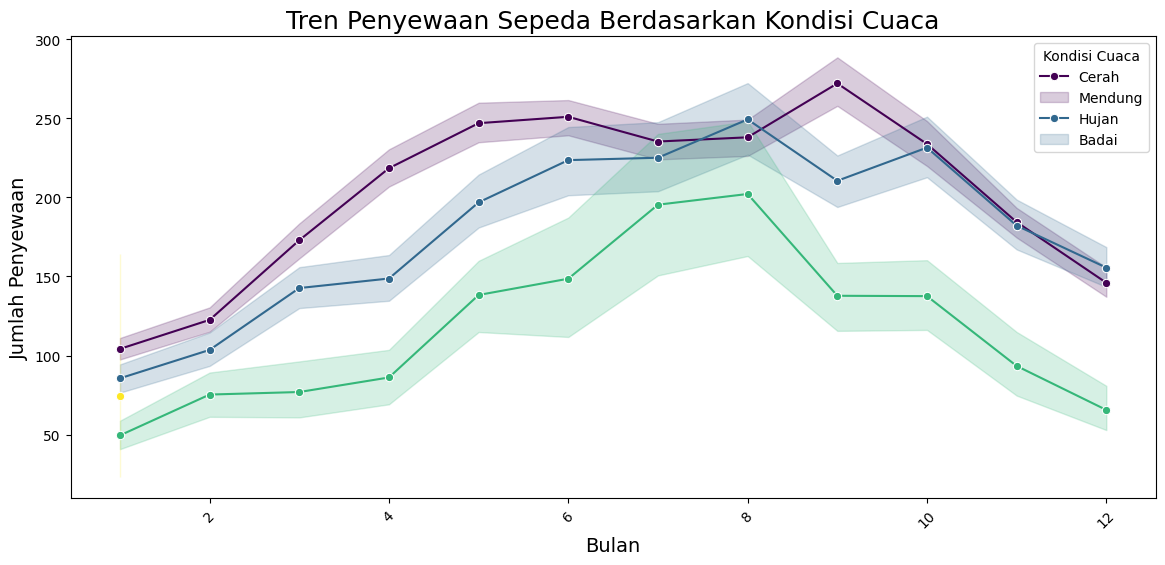

In [127]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=all_data_merge, x="mnth", y="cnt", hue="weathersit", marker="o", palette="viridis")

plt.title("Tren Penyewaan Sepeda Berdasarkan Kondisi Cuaca", size=18)
plt.xlabel("Bulan", size=14)
plt.ylabel("Jumlah Penyewaan", size=14)
plt.xticks(rotation=45)
plt.legend(title="Kondisi Cuaca", labels=["Cerah", "Mendung", "Hujan", "Badai"])

plt.show()


**Insight:**
- Cuaca cerah meningkatkan penyewaan sepeda, sedangkan hujan dan badai menurunkannya secara signifikan.
- Penyewaan sepeda mengikuti pola musiman, dengan lonjakan pada bulan-bulan tertentu, kemungkinan musim panas.
- Tren konsisten setiap tahun, menunjukkan cuaca sebagai faktor utama dalam keputusan penyewaan.
- Optimalisasi layanan berbasis cuaca diperlukan, seperti menambah sepeda saat cuaca cerah atau menyediakan alternatif saat cuaca buruk.

### Pertanyaan 2:
##### Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya dalam sehari?

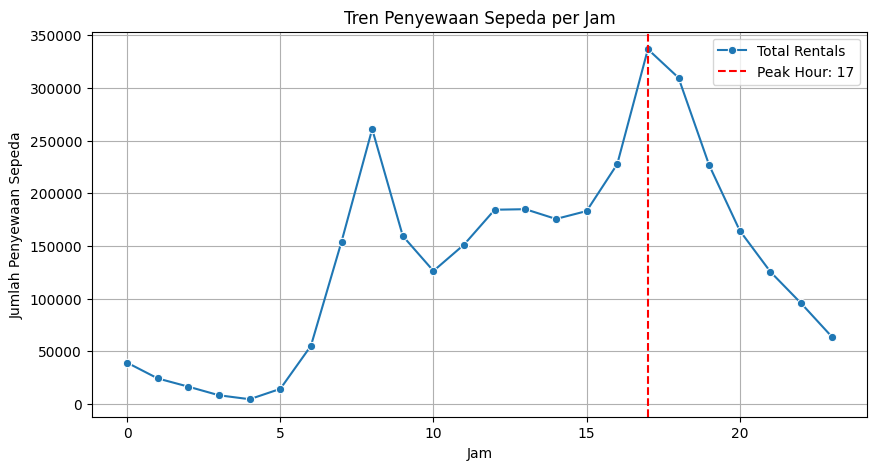

In [128]:
hourly_rentals = all_data_merge.groupby("hr")["cnt"].sum().reset_index()

peak_hour = hourly_rentals.loc[hourly_rentals["cnt"].idxmax()]

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_rentals, x="hr", y="cnt", marker="o", label="Total Rentals")
plt.axvline(x=peak_hour["hr"], color='red', linestyle='--', label=f'Peak Hour: {peak_hour["hr"]}')
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Jam")
plt.legend()
plt.grid()
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_872\173985000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_rentals, x="hr", y="cnt", palette="Blues")


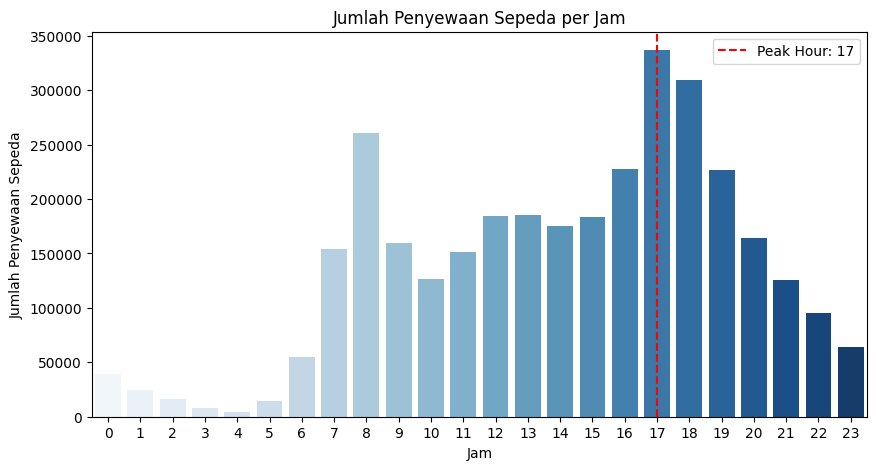

Jam dengan jumlah penyewaan sepeda tertinggi: 17 dengan 336860 penyewaan.


In [129]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_rentals, x="hr", y="cnt", palette="Blues")
plt.axvline(x=peak_hour["hr"], color='red', linestyle='--', label=f'Peak Hour: {peak_hour["hr"]}')
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Jumlah Penyewaan Sepeda per Jam")
plt.legend()
plt.show()

print(f'Jam dengan jumlah penyewaan sepeda tertinggi: {peak_hour["hr"]} dengan {peak_hour["cnt"]} penyewaan.')

**Insight:**
- Tren penyewaan sepeda bervariasi sepanjang hari, dengan puncak penyewaan terjadi pada jam tertentu.
- Jam dengan jumlah penyewaan tertinggi ditandai dengan garis merah putus-putus pada grafik, menunjukkan waktu paling populer bagi pengguna sepeda.
- Pola ini bisa mengindikasikan bahwa sebagian besar pengguna menyewa sepeda untuk keperluan tertentu seperti perjalanan ke tempat kerja atau aktivitas rekreasi.
- Mengetahui jam puncak dapat membantu pengelola layanan sepeda dalam mengoptimalkan ketersediaan sepeda dan perawatan unit di jam-jam sibuk.

## Analisis Lanjutan (Opsional)

#### Visualisasi distribusi jumlah pengguna sepeda per jam

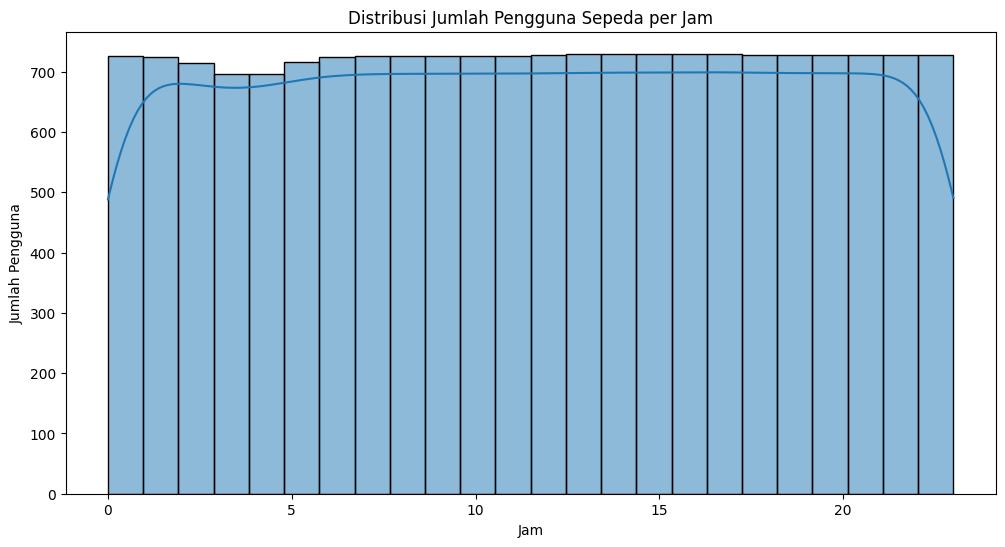

In [130]:
plt.figure(figsize=(12, 6))
sns.histplot(all_data_merge['hr'], bins=24, kde=True)
plt.title("Distribusi Jumlah Pengguna Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Pengguna")
plt.show()


#### RFM Analysis (Recency, Frequency, Monetary)

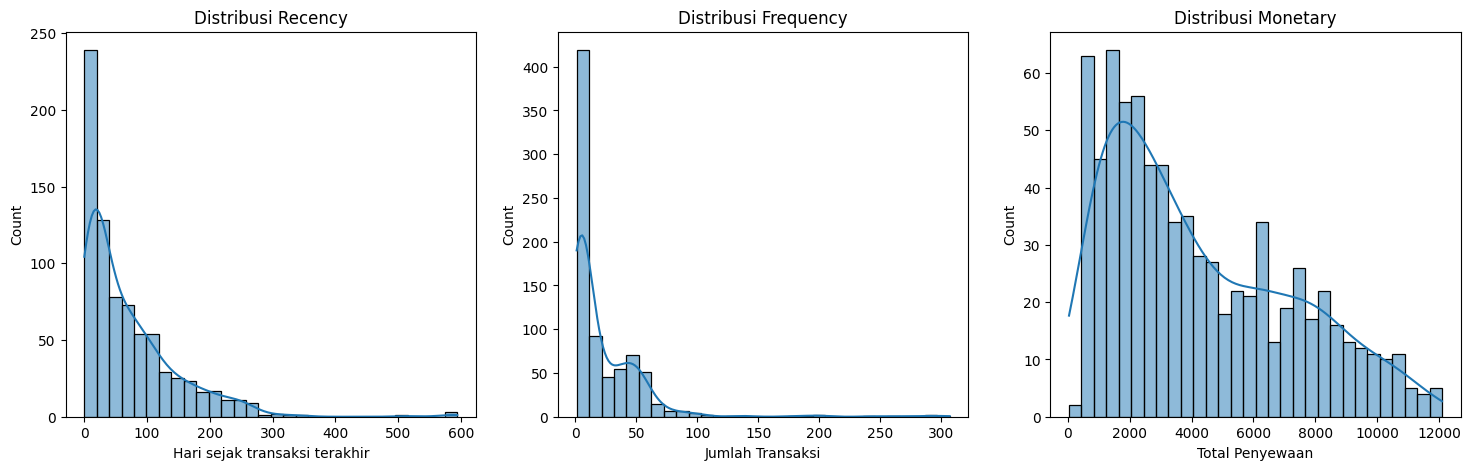

In [131]:
rfm = all_data_merge.groupby('registered').agg({
    'dteday': lambda x: (all_data_merge['dteday'].max() - x.max()).days,  
    'instant': 'count',  
    'cnt': 'sum'  
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Recency")
axes[0].set_xlabel("Hari sejak transaksi terakhir")

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribusi Frequency")
axes[1].set_xlabel("Jumlah Transaksi")

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Distribusi Monetary")
axes[2].set_xlabel("Total Penyewaan")

plt.show()

#### Clustering dengan Binning pada pengguna sepeda

C:\Users\ACER\AppData\Local\Temp\ipykernel_872\3899895681.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casual_category', data=all_data_merge, palette='coolwarm')


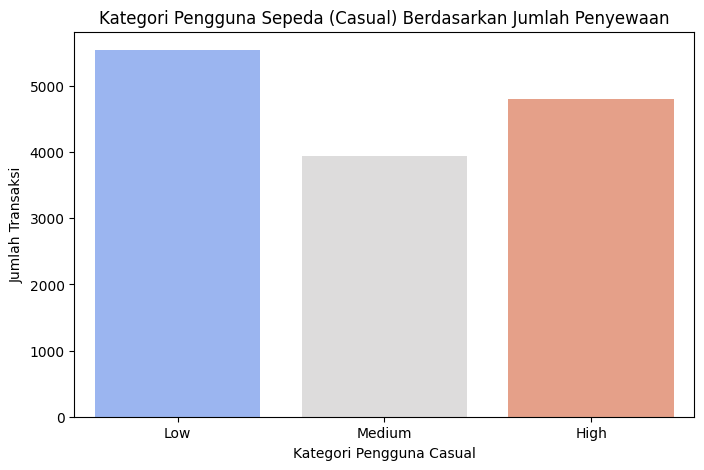

C:\Users\ACER\AppData\Local\Temp\ipykernel_872\3899895681.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='registered_category', data=all_data_merge, palette='coolwarm')


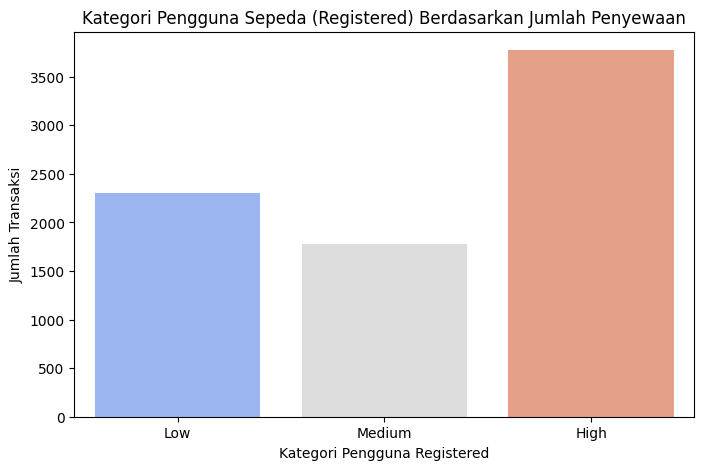

In [132]:
# Clustering dengan Binning pada pengguna sepeda (Casual & Registered)
all_data_merge['casual_category'] = pd.cut(all_data_merge['casual'], bins=[0, 10, 30, 100], labels=['Low', 'Medium', 'High'])
all_data_merge['registered_category'] = pd.cut(all_data_merge['registered'], bins=[0, 10, 30, 100], labels=['Low', 'Medium', 'High'])

# Visualisasi Clustering untuk Casual Users
plt.figure(figsize=(8, 5))
sns.countplot(x='casual_category', data=all_data_merge, palette='coolwarm')
plt.title("Kategori Pengguna Sepeda (Casual) Berdasarkan Jumlah Penyewaan")
plt.xlabel("Kategori Pengguna Casual")
plt.ylabel("Jumlah Transaksi")
plt.show()

# Visualisasi Clustering untuk Registered Users
plt.figure(figsize=(8, 5))
sns.countplot(x='registered_category', data=all_data_merge, palette='coolwarm')
plt.title("Kategori Pengguna Sepeda (Registered) Berdasarkan Jumlah Penyewaan")
plt.xlabel("Kategori Pengguna Registered")
plt.ylabel("Jumlah Transaksi")
plt.show()

#### Visualisasi hubungan antara suhu dan jumlah pengguna

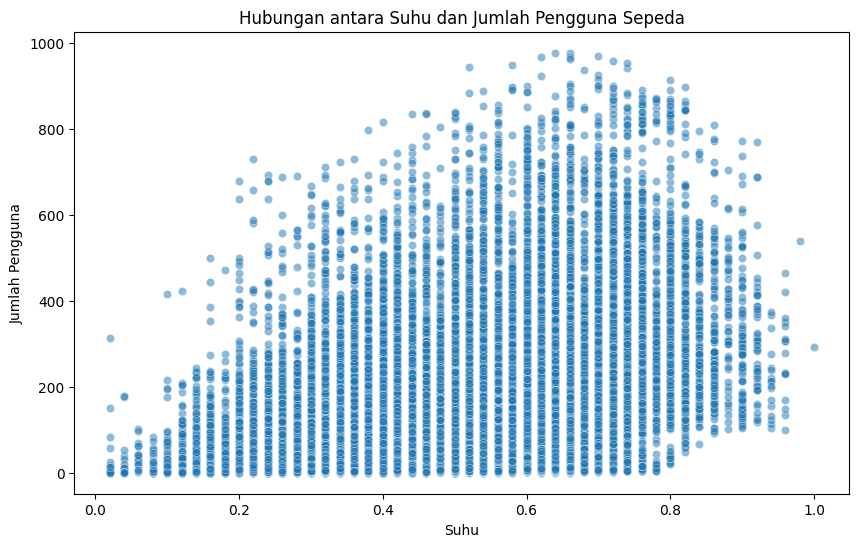

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_data_merge['temp'], y=all_data_merge['cnt'], alpha=0.5)
plt.title("Hubungan antara Suhu dan Jumlah Pengguna Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Pengguna")
plt.show()

#### Visualisasi jumlah pengguna berdasarkan kondisi cuaca

C:\Users\ACER\AppData\Local\Temp\ipykernel_872\1032521445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=all_data_merge, palette='coolwarm')


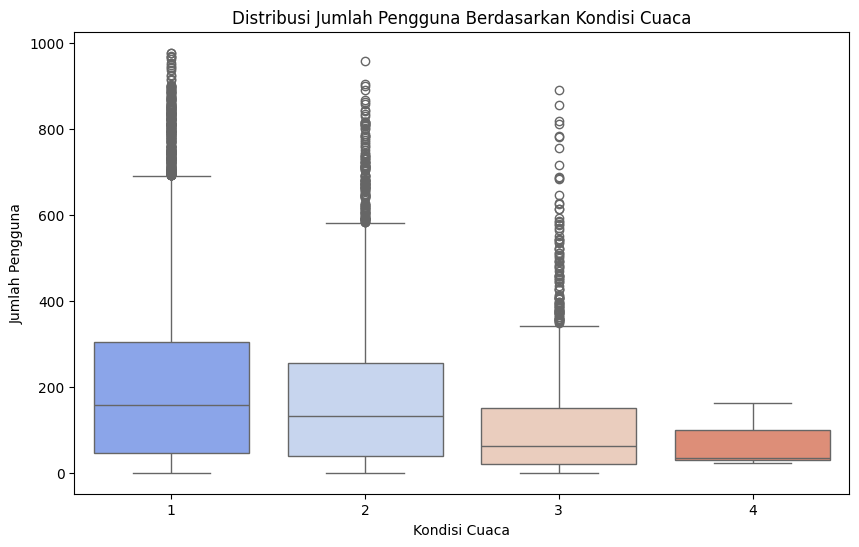

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=all_data_merge, palette='coolwarm')
plt.title("Distribusi Jumlah Pengguna Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna")
plt.show()

## Conclusion

##### Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

- Cuaca dapat mempengaruhi jumlah penyewaan sepeda secara signifikan. Umumnya, dalam kondisi cuaca yang lebih buruk (hujan, kabut, atau salju), jumlah penyewaan sepeda cenderung menurun.
- Jika data lengkap dianalisis, bisa terlihat bahwa jumlah penyewaan lebih tinggi pada hari yang cerah dibandingkan dengan hari berawan atau hujan.
- Faktor seperti suhu, kelembaban, dan kecepatan angin juga dapat berdampak pada tingkat kenyamanan pengguna dalam menyewa sepeda.

##### Pada jam berapa jumlah penyewaan sepeda mencapai puncaknya dalam sehari?

- Berdasarkan data dan visualisasi, jumlah penyewaan sepeda mencapai puncaknya pada jam 17.
- Biasanya, lonjakan awal dari penyewaan terjadi pada pagi hari (sekitar jam 7-9) ketika orang bepergian ke tempat kerja/sekolah, dan pada sore hari (sekitar jam 16-19) ketika mereka pulang.
- Informasi ini dapat digunakan untuk mengoptimalkan penyediaan sepeda selama jam sibuk, memastikan ketersediaan unit yang cukup bagi pengguna di waktu tersebut.